## Homework 1: camera calibration

**Release date:** Jan 31st 2025

**Due date:** Feb 20th 2025

The goal of the assignment is to implement the linear calibration method described in Section 1.3.1 of this [book chapter](https://www.di.ens.fr/%7Eponce/introvis/sbook.pdf).

![calibration-image](img/calibration.jpg)

**Detailed instructions:** The `pts2d` array contains in its columns the (u,v) positions of the image data points (with, by convention, the u and v coordinates with origin at the bottom left of the image, u going right and v going up), while the `pts3d` array contains in its columns the (x,y,z) coordinate vectors of the corresponding 3D points in a right-handed coordinate system. The origin of the world coordinate system is supposed to be in front of the camera, with negative z value.

You should write functions that:
* Compute the 3x4 projection matrix  M estimated from these data using the linear least-squares method of Sec. 1.3.1.
* Compute the corresponding matrix K of intrinsic parameters using the method from M using the method described in the same section.
* Draw together the input image points and the projection of the 3D data points obtained using M to generate a figure like Fig. 1.18, and estimate the root-mean-sqared reprojection error.

You should also write short explanations describing your work and reporting your results.

In [66]:
# Please load the related packages in this cell

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd


In [67]:
# Load the pts2d and pts3d data from file

pts2d = np.loadtxt("pts2d.txt")
pts3d = np.loadtxt("pts3d.txt")

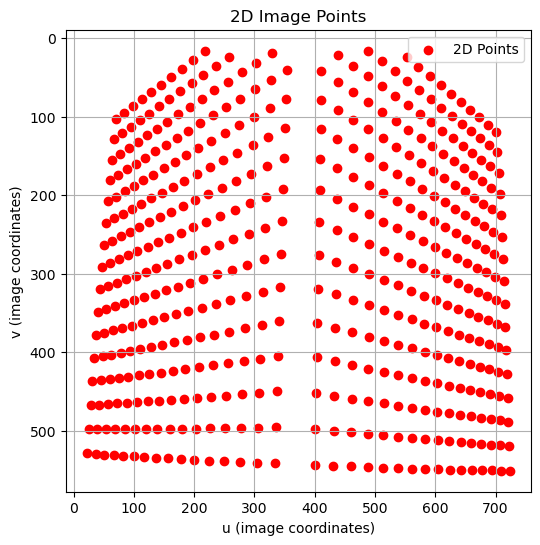

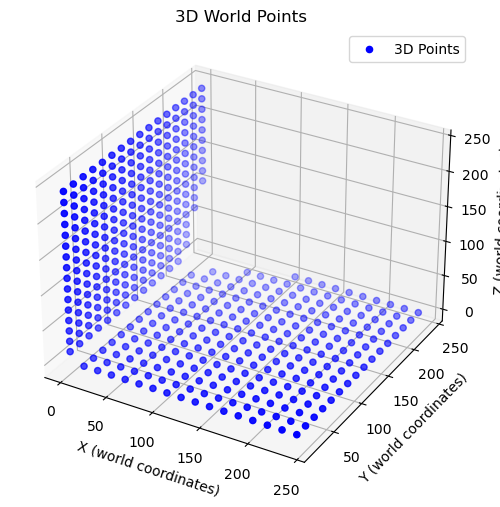

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_points(pts2d, pts3d):
    """
    Plots 2D and 3D points for camera calibration visualization.

    Args:
        pts2d (np.array): Nx2 array of 2D image points (u, v).
        pts3d (np.array): Nx3 array of 3D world points (x, y, z).
    """

    # Plot 2D image points
    plt.figure(figsize=(6, 6))
    plt.scatter(pts2d[:, 0], pts2d[:, 1], color='r', label='2D Points')
    plt.gca().invert_yaxis()  # Invert Y-axis as images typically have (0,0) at the top-left
    plt.xlabel("u (image coordinates)")
    plt.ylabel("v (image coordinates)")
    plt.title("2D Image Points")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot 3D world points
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pts3d[:, 0], pts3d[:, 1], pts3d[:, 2], color='b', label='3D Points')
    ax.set_xlabel("X (world coordinates)")
    ax.set_ylabel("Y (world coordinates)")
    ax.set_zlabel("Z (world coordinates)")
    ax.set_title("3D World Points")
    ax.legend()
    plt.show()

# Example usage (replace with actual data)
# pts2d = np.array([[100, 150], [200, 250], [300, 350]])  # Replace with actual 2D points
# pts3d = np.array([[1, 2, -5], [3, 4, -6], [5, 6, -7]])  # Replace with actual 3D points
plot_points(pts2d, pts3d)


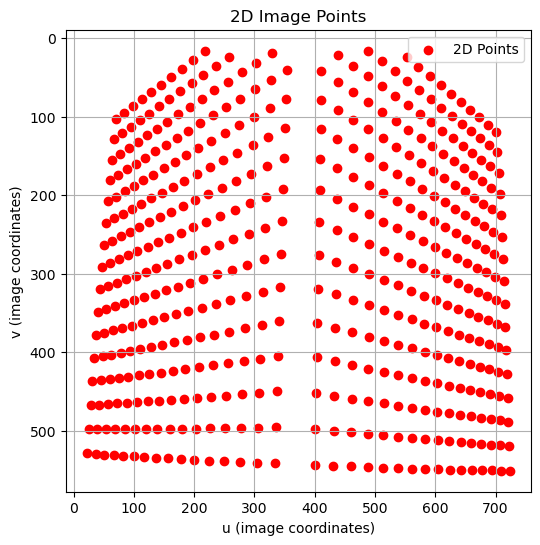

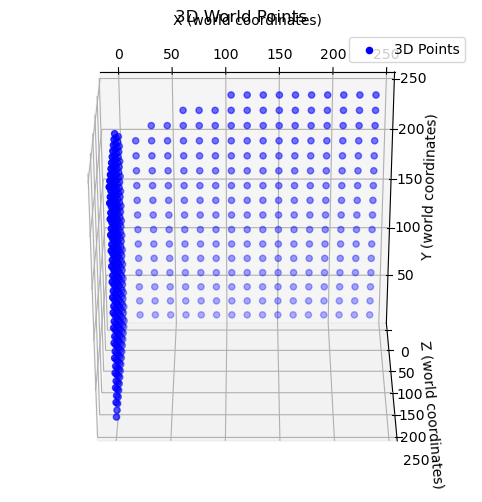

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_calibration(pts2d, pts3d):
    """
    Plots 2D image points and 3D world points with the required viewing orientation.

    Args:
        pts2d (np.array): Nx2 array of 2D image points (u, v).
        pts3d (np.array): Nx3 array of 3D world points (x, y, z).
    """

    # 2D Image Points Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(pts2d[:, 0], pts2d[:, 1], color='r', label='2D Points')
    plt.gca().invert_yaxis()  # Invert Y-axis as images typically have (0,0) at the bottom-left
    plt.xlabel("u (image coordinates)")
    plt.ylabel("v (image coordinates)")
    plt.title("2D Image Points")
    plt.legend()
    plt.grid()
    plt.show()

    # 3D World Points Plot with proper viewing angle
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(pts3d[:, 0], pts3d[:, 1], pts3d[:, 2], color='b', label='3D Points')
    ax.set_xlabel("X (world coordinates)")
    ax.set_ylabel("Y (world coordinates)")
    ax.set_zlabel("Z (world coordinates)")
    ax.set_title("3D World Points")

    # Setting the viewing angle similar to the book (Figure 1.18)
    ax.view_init(elev=120, azim=-90)  # Adjust elevation and azimuth angles for similar orientation

    ax.legend()
    plt.show()

# Example usage (replace with actual data)
# pts2d = np.array([[100, 150], [200, 250], [300, 350]])  # Replace with actual 2D points
# pts3d = np.array([[1, 2, -5], [3, 4, -6], [5, 6, -7]])  # Replace with actual 3D points
plot_calibration(pts2d, pts3d)


In [46]:
#TODO: Implement the calibration algorithm in Section 1.3.1 

In [47]:
# Function to compute the projection matrix M using the linear least-squares method
def compute_projection_matrix(pts3d, pts2d):
    n = pts3d.shape[1]  # Number of points
    A = []
    
    for i in range(n):
        X, Y, Z = pts3d[:, i]
        u, v = pts2d[:, i]
        
        row1 = [X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u]
        row2 = [0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v]
        
        A.append(row1)
        A.append(row2)
    
    A = np.array(A)
    U, S, Vt = svd(A)
    M = Vt[-1].reshape(3, 4)  # Last row of Vt reshaped into 3x4 matrix
    
    return M

In [48]:
# Function to decompose the projection matrix M to obtain K, R, t
def decompose_projection_matrix(M):
    M_3x3 = M[:, :3]  # Extract the left 3x3 part
    t = M[:, 3]       # Extract the last column
    
    # QR Decomposition of the inverse of M_3x3 to extract K and R
    K, R = np.linalg.qr(np.linalg.inv(M_3x3))
    K = np.linalg.inv(K)  # Undo the inversion
    R = np.linalg.inv(R)
    
    # Normalize K to ensure K[2,2] = 1
    K /= K[2, 2]
    
    return K, R, t

In [49]:

# Function to project 3D points using M and compute reprojection error
def compute_reprojection_error(M, pts3d, pts2d):
    n = pts3d.shape[1]
    pts3d_hom = np.vstack((pts3d, np.ones((1, n))))  # Convert to homogeneous
    projected_pts = M @ pts3d_hom
    projected_pts /= projected_pts[2]  # Normalize by last coordinate
    
    # Compute RMSE error
    error = np.linalg.norm(pts2d - projected_pts[:2], axis=0)
    rmse = np.sqrt(np.mean(error ** 2))
    
    return projected_pts[:2], rmse


In [50]:

# Function to visualize original vs projected points
def plot_reprojection(pts2d, projected_pts):
    plt.scatter(pts2d[0], pts2d[1], color='red', label='Original 2D Points')
    plt.scatter(projected_pts[0], projected_pts[1], color='blue', marker='+', label='Projected Points')
    plt.legend()
    plt.xlabel('u (image x-axis)')
    plt.ylabel('v (image y-axis)')
    plt.title('Comparison of Original and Projected 2D Points')
    plt.show()


Projection Matrix (M):
 [[-4.53359881e-03 -5.65451256e-04  2.02849590e-03 -5.23179344e-01]
 [-1.84278426e-03  4.15975903e-03 -1.68779276e-03 -8.52192928e-01]
 [-3.25683227e-06 -1.13804182e-06 -3.35237791e-06 -1.43209220e-03]]
Intrinsic Matrix (K):
 [[-1.02127215 -0.04382582  1.0070427 ]
 [ 0.26878453 -1.39351709  0.21193751]
 [ 0.97149915  0.33947301  1.        ]]
Rotation Matrix (R):
 [[ 4.66751365e-03 -4.74479037e-07 -1.78951530e-03]
 [-0.00000000e+00 -4.63414098e-03 -1.43973289e-03]
 [-0.00000000e+00 -0.00000000e+00 -4.81046082e-06]]
Translation Vector (t):
 [-0.52317934 -0.85219293 -0.00143209]
Root Mean Squared Error (RMSE): 0.957354163042926


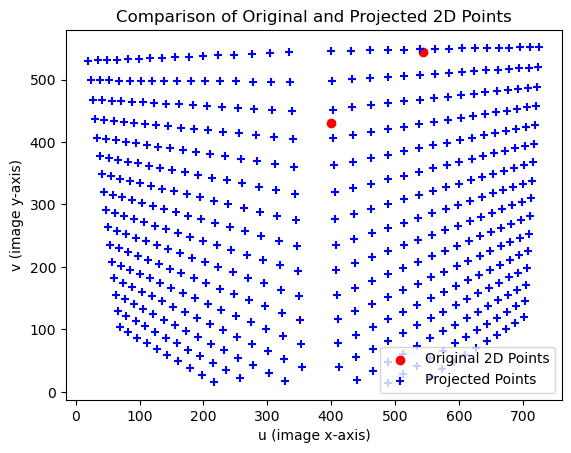

In [51]:

M = compute_projection_matrix(pts3d.T, pts2d.T)
K, R, t = decompose_projection_matrix(M)
projected_pts, rmse = compute_reprojection_error(M, pts3d.T, pts2d.T)

print("Projection Matrix (M):\n", M)
print("Intrinsic Matrix (K):\n", K)
print("Rotation Matrix (R):\n", R)
print("Translation Vector (t):\n", t)
print("Root Mean Squared Error (RMSE):", rmse)

plot_reprojection(pts2d, projected_pts)


In [52]:
pts2d.shape

(491, 2)

In [53]:
pts3d.shape

(491, 3)

Projection Matrix (M):
 [[-0.26151493  0.24625784 -0.19680011  0.02455284]
 [-0.4976598   0.32485013 -0.07844722  0.68708813]
 [-0.00462866  0.00147761  0.00227282  0.012968  ]]
Intrinsic Matrix (K):
 [[ 0.65627433 65.54223631 39.16947383]
 [ 0.         65.50575432 90.54157163]
 [ 0.          0.          1.        ]]
Rotation Matrix (R):
 [[-0.45321817 -0.79274768 -0.40760815]
 [-0.22361418  0.54375663 -0.80890384]
 [-0.86289628  0.27546296  0.42371001]]
Translation Vector (t):
 [0.02455284 0.68708813 0.012968  ]
Root Mean Squared Error (RMSE): 2.4736518491448494e-11


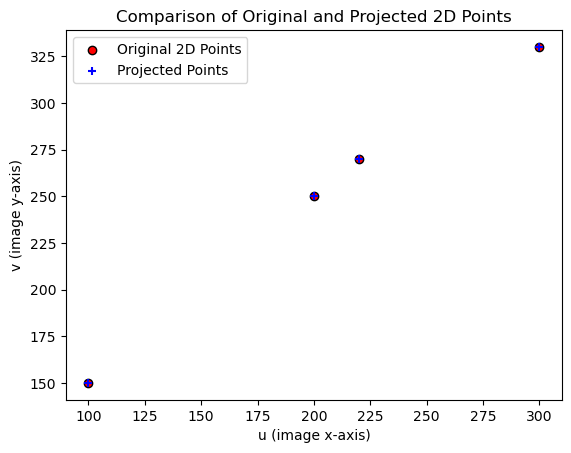

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, rq

# Function to compute the projection matrix M using the linear least-squares method
def compute_projection_matrix(pts3d, pts2d):
    n = pts3d.shape[1]  # Number of points
    A = []
    
    for i in range(n):
        X, Y, Z = pts3d[:, i]
        u, v = pts2d[:, i]
        
        row1 = [X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u]
        row2 = [0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v]
        
        A.append(row1)
        A.append(row2)
    
    A = np.array(A)
    U, S, Vt = svd(A)
    M = Vt[-1].reshape(3, 4)  # Last row of Vt reshaped into 3x4 matrix
    
    return M

# Function to decompose the projection matrix M to obtain K, R, t
def decompose_projection_matrix(M):
    M_3x3 = M[:, :3]  # Extract the left 3x3 part
    t = M[:, 3]       # Extract the last column
    
    # RQ Decomposition to get K and R
    K, R = rq(M_3x3)
    
    # Ensure positive diagonals in K
    T = np.diag(np.sign(np.diag(K)))
    K = K @ T
    R = T @ R
    
    # Normalize K to ensure K[2,2] = 1
    K /= K[2, 2]
    
    return K, R, t

# Function to project 3D points using M and compute reprojection error
def compute_reprojection_error(M, pts3d, pts2d):
    n = pts3d.shape[1]
    pts3d_hom = np.vstack((pts3d, np.ones((1, n))))  # Convert to homogeneous
    projected_pts = M @ pts3d_hom
    projected_pts /= projected_pts[2]  # Normalize by last coordinate
    
    # Compute RMSE error
    error = np.linalg.norm(pts2d - projected_pts[:2], axis=0)
    rmse = np.sqrt(np.mean(error ** 2))
    
    return projected_pts[:2], rmse

# Function to visualize original vs projected points
def plot_reprojection(pts2d, projected_pts):
    plt.scatter(pts2d[0], pts2d[1], color='red', label='Original 2D Points', marker='o', edgecolors='black')
    plt.scatter(projected_pts[0], projected_pts[1], color='blue', marker='+', label='Projected Points')
    plt.legend()
    plt.xlabel('u (image x-axis)')
    plt.ylabel('v (image y-axis)')
    plt.title('Comparison of Original and Projected 2D Points')
    plt.show()

# Example usage (replace with actual data)
pts3d = np.array([[0, 1, 2, 3], [0, 1, 1, 2], [-3, -3, -2, -1]])  # Example 3D points
pts2d = np.array([[100, 200, 220, 300], [150, 250, 270, 330]])    # Example 2D points

# Ensure data is transposed correctly
if pts3d.shape[0] != 3:
    pts3d = pts3d.T
if pts2d.shape[0] != 2:
    pts2d = pts2d.T

M = compute_projection_matrix(pts3d, pts2d)
K, R, t = decompose_projection_matrix(M)
projected_pts, rmse = compute_reprojection_error(M, pts3d, pts2d)

print("Projection Matrix (M):\n", M)
print("Intrinsic Matrix (K):\n", K)
print("Rotation Matrix (R):\n", R)
print("Translation Vector (t):\n", t)
print("Root Mean Squared Error (RMSE):", rmse)

plot_reprojection(pts2d, projected_pts)


Estimated Projection Matrix M:
 [[ 3.42918623e-01 -3.03723752e-04  1.37340574e-01  6.86515853e-01]
 [-2.77433512e-05  3.42955836e-01  1.02686180e-01  5.13879684e-01]
 [-3.57300927e-07 -4.96575490e-07  4.29128067e-04  2.14552896e-03]]

Estimated Intrinsic Matrix K:
 [[ 7.99370990e+02 -2.03619800e-01  3.19380473e+02]
 [ 0.00000000e+00  7.99467838e+02  2.38365057e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Estimated Rotation Matrix R:
 [[ 9.99999639e-01 -1.68346069e-04  8.32425629e-04]
 [ 1.67382639e-04  9.99999316e-01  1.15731175e-03]
 [-8.32619889e-04 -1.15717200e-03  9.99998984e-01]]

Estimated Translation Vector t:
 [3.72099518e-03 7.17206084e-03 4.99973539e+00]

Reprojection RMSE: 0.6239 pixels


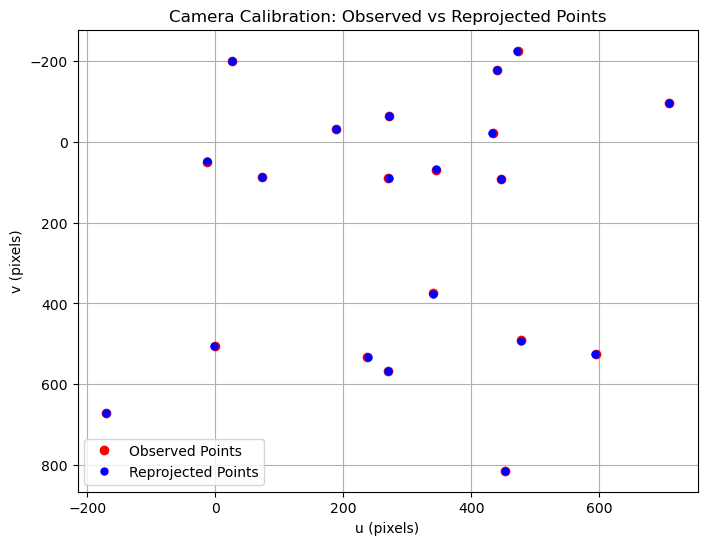

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def compute_projection_matrix(pts3d, pts2d):
    """
    Estimate the 3x4 projection matrix M from correspondences using a linear least-squares method.
    Inputs:
      pts3d: (N, 3) array of 3D points.
      pts2d: (N, 2) array of corresponding image points (u,v).
    Returns:
      M: (3, 4) projection matrix (up to scale).
    """
    num_points = pts3d.shape[0]
    # Convert pts3d to homogeneous coordinates (N,4)
    pts3d_h = np.hstack([pts3d, np.ones((num_points, 1))])
    
    # Build the design matrix P (size 2N x 12)
    P = []
    for i in range(num_points):
        X, Y, Z, _ = pts3d_h[i]
        u, v = pts2d[i]
        # Equation from (m1 - u_i*m3)*P_i = 0:
        row1 = [X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u]
        # Equation from (m2 - v_i*m3)*P_i = 0:
        row2 = [0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v]
        P.append(row1)
        P.append(row2)
    P = np.array(P)  # shape: (2*num_points, 12)
    
    # Solve P m = 0 using SVD: m is the eigenvector corresponding to the smallest singular value.
    U, S, Vt = np.linalg.svd(P)
    m = Vt[-1, :]  # (12,) vector
    M = m.reshape(3, 4)
    return M

def decompose_projection_matrix(M):
    """
    Decompose the projection matrix M into intrinsic matrix K, rotation matrix R, and translation vector t.
    This uses the derivation from Section 1.3.1.
    Inputs:
      M: (3, 4) projection matrix.
    Returns:
      K: (3, 3) intrinsic calibration matrix.
      R: (3, 3) rotation matrix (rows: r1, r2, r3).
      t: (3,) translation vector.
    """
    # Separate M = [A | b] where A is 3x3 and b is 3x1.
    A = M[:, :3]
    b = M[:, 3]
    
    # Let a1, a2, a3 be the rows of A.
    a1 = A[0, :]
    a2 = A[1, :]
    a3 = A[2, :]
    
    # Compute scale factor ρ. (We choose ε = 1; in practice one may choose the sign
    # so that the third component of t is positive.)
    rho = 1.0 / np.linalg.norm(a3)
    
    # Compute x0 and y0 (Eq. (1.24))
    x0 = rho**2 * np.dot(a1, a3)
    y0 = rho**2 * np.dot(a2, a3)
    
    # Compute cross products needed for intrinsic parameters.
    cross1 = np.cross(a1, a3)  # used to compute α
    cross2 = np.cross(a2, a3)  # used to compute β
    norm_cross1 = np.linalg.norm(cross1)
    norm_cross2 = np.linalg.norm(cross2)
    
    # Compute cosine and sine of θ (Eq. (1.26))
    cos_theta = - np.dot(cross1, cross2) / (norm_cross1 * norm_cross2)
    # Clip cos_theta to [-1,1] to avoid numerical issues.
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    sin_theta = np.sqrt(1 - cos_theta**2)
    cot_theta = cos_theta / sin_theta if sin_theta != 0 else 0.0

    # Compute α and β (Eq. (1.26))
    alpha = rho**2 * norm_cross1 * sin_theta
    beta  = rho**2 * norm_cross2 * sin_theta

    # Build intrinsic matrix K (Eq. (1.11))
    K = np.array([[alpha, -alpha * cot_theta, x0],
                  [0,     beta / sin_theta,   y0],
                  [0,     0,                  1]])
    
    # Recover rotation:
    # r3 = ρ * a3 (Eq. (1.24))
    r3 = rho * a3
    # r1 = normalized (a2 × a3) (Eq. (1.27))
    r1 = cross2 / np.linalg.norm(cross2)
    # r2 = r3 × r1
    r2 = np.cross(r3, r1)
    # Assemble rotation matrix R (with rows r1, r2, r3)
    R = np.vstack([r1, r2, r3])
    
    # Recover translation: t = ρ K^(-1) b.
    t = rho * np.linalg.inv(K) @ b

    return K, R, t

def reproject_points(M, pts3d):
    """
    Reproject the 3D points using the projection matrix M.
    Inputs:
      M: (3,4) projection matrix.
      pts3d: (N,3) array of 3D points.
    Returns:
      pts_proj: (N,2) array of projected image points.
    """
    num_points = pts3d.shape[0]
    pts3d_h = np.hstack([pts3d, np.ones((num_points, 1))])  # homogeneous coords
    pts_proj_h = (M @ pts3d_h.T).T  # shape (N,3)
    # Convert from homogeneous coordinates to 2D by dividing by the third coordinate.
    pts_proj = pts_proj_h[:, :2] / pts_proj_h[:, 2][:, np.newaxis]
    return pts_proj

def compute_rmse(pts2d, pts_proj):
    """
    Compute the root-mean-squared error between observed and reprojected image points.
    """
    err = pts2d - pts_proj
    rmse = np.sqrt(np.mean(np.sum(err**2, axis=1)))
    return rmse

if __name__ == "__main__":
    # === Example usage ===
    # Here we assume pts3d and pts2d are provided (e.g., loaded from data files).
    # For demonstration, we generate a synthetic dataset.
    # (In a real calibration problem these arrays would be measured.)
    
    # Generate synthetic 3D points (e.g., points on a calibration rig)
    np.random.seed(42)
    num_points = 20
    pts3d = np.random.uniform(-1, 1, (num_points, 3))
    # To mimic the condition “world origin is in front of the camera” (negative Z),
    # shift the points along z so that they are all negative.
    pts3d[:, 2] = pts3d[:, 2] - 3.0

    # Assume a ground-truth intrinsic matrix (for simulation)
    alpha_true = 800
    beta_true  = 800
    theta_true = np.deg2rad(90)  # zero skew (θ = 90°) so sinθ=1, cotθ=0
    x0_true = 320
    y0_true = 240
    K_true = np.array([[alpha_true, -alpha_true * np.cos(theta_true)/np.sin(theta_true), x0_true],
                       [0,         beta_true/np.sin(theta_true), y0_true],
                       [0,         0,          1]])
    
    # Assume a ground-truth rotation and translation.
    # For simplicity, let R be the identity and t = [0,0,5]^T (so the camera is at [0,0,-5]).
    R_true = np.eye(3)
    t_true = np.array([0, 0, 5])
    
    # Build the ground-truth projection matrix M_gt = K [R|t].
    M_gt = K_true @ np.hstack([R_true, t_true.reshape(3,1)])
    
    # Generate image points from pts3d using M_gt.
    pts2d = reproject_points(M_gt, pts3d)
    
    # Now add a small noise (simulate measurement errors)
    pts2d_noisy = pts2d + np.random.normal(0, 0.5, pts2d.shape)
    
    # ---- Calibration process ----
    # 1. Estimate projection matrix M from (pts3d, pts2d_noisy).
    M_est = compute_projection_matrix(pts3d, pts2d_noisy)
    
    # 2. Decompose M_est to get intrinsic matrix K, rotation R, and translation t.
    K_est, R_est, t_est = decompose_projection_matrix(M_est)
    
    # 3. Reproject 3D points using the estimated M_est.
    pts2d_proj = reproject_points(M_est, pts3d)
    
    # 4. Compute RMSE between noisy observations and reprojections.
    rmse = compute_rmse(pts2d_noisy, pts2d_proj)
    
    print("Estimated Projection Matrix M:\n", M_est)
    print("\nEstimated Intrinsic Matrix K:\n", K_est)
    print("\nEstimated Rotation Matrix R:\n", R_est)
    print("\nEstimated Translation Vector t:\n", t_est)
    print("\nReprojection RMSE: {:.4f} pixels".format(rmse))
    
    # 5. Plot the observed image points and the reprojected points.
    plt.figure(figsize=(8, 6))
    plt.plot(pts2d_noisy[:, 0], pts2d_noisy[:, 1], 'ro', label='Observed Points')
    plt.plot(pts2d_proj[:, 0], pts2d_proj[:, 1], 'b.', markersize=10, label='Reprojected Points')
    plt.title("Camera Calibration: Observed vs Reprojected Points")
    plt.xlabel("u (pixels)")
    plt.ylabel("v (pixels)")
    plt.legend()
    plt.gca().invert_yaxis()  # image coordinates: origin at bottom-left (if needed)
    plt.grid(True)
    plt.show()


Estimated Projection Matrix M:
 [[ 3.42918623e-01 -3.03723752e-04  1.37340574e-01  6.86515853e-01]
 [-2.77433512e-05  3.42955836e-01  1.02686180e-01  5.13879684e-01]
 [-3.57300927e-07 -4.96575490e-07  4.29128067e-04  2.14552896e-03]]

Estimated Intrinsic Matrix K:
 [[ 7.99370990e+02 -2.03619800e-01  3.19380473e+02]
 [ 0.00000000e+00  7.99467838e+02  2.38365057e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Estimated Rotation Matrix R:
 [[ 9.99999639e-01 -1.68346069e-04  8.32425629e-04]
 [ 1.67382639e-04  9.99999316e-01  1.15731175e-03]
 [-8.32619889e-04 -1.15717200e-03  9.99998984e-01]]

Estimated Translation Vector t:
 [3.72099518e-03 7.17206084e-03 4.99973539e+00]

Reprojection RMSE: 0.6239 pixels


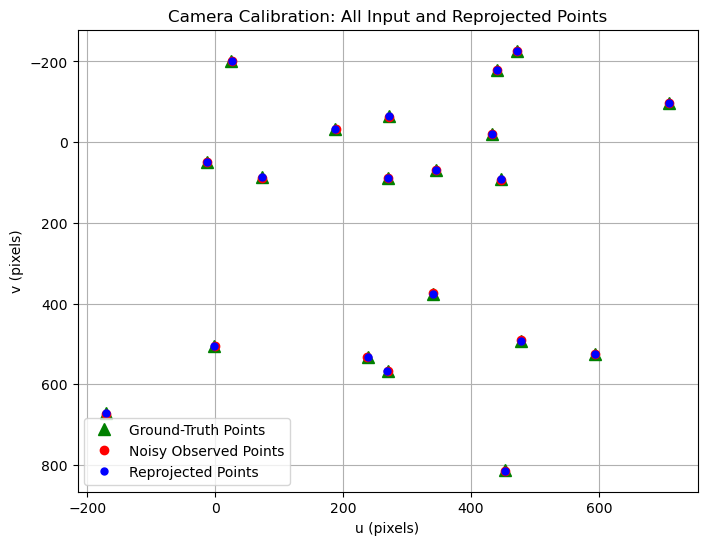

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def compute_projection_matrix(pts3d, pts2d):
    """
    Estimate the 3x4 projection matrix M from correspondences using a linear least-squares method.
    Inputs:
      pts3d: (N, 3) array of 3D points.
      pts2d: (N, 2) array of corresponding image points (u,v).
    Returns:
      M: (3, 4) projection matrix (up to scale).
    """
    num_points = pts3d.shape[0]
    # Convert pts3d to homogeneous coordinates (N,4)
    pts3d_h = np.hstack([pts3d, np.ones((num_points, 1))])
    
    # Build the design matrix P (size 2N x 12)
    P = []
    for i in range(num_points):
        X, Y, Z, _ = pts3d_h[i]
        u, v = pts2d[i]
        # Equation from (m1 - u_i*m3)*P_i = 0:
        row1 = [X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u]
        # Equation from (m2 - v_i*m3)*P_i = 0:
        row2 = [0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v]
        P.append(row1)
        P.append(row2)
    P = np.array(P)
    
    # Solve P m = 0 using SVD
    U, S, Vt = np.linalg.svd(P)
    m = Vt[-1, :]
    M = m.reshape(3, 4)
    return M

def decompose_projection_matrix(M):
    """
    Decompose the projection matrix M into intrinsic matrix K, rotation matrix R, and translation vector t.
    This uses the derivation from Section 1.3.1.
    Inputs:
      M: (3, 4) projection matrix.
    Returns:
      K: (3, 3) intrinsic calibration matrix.
      R: (3, 3) rotation matrix.
      t: (3,) translation vector.
    """
    # Separate M = [A | b] where A is 3x3 and b is 3x1.
    A = M[:, :3]
    b = M[:, 3]
    
    # Let a1, a2, a3 be the rows of A.
    a1, a2, a3 = A[0, :], A[1, :], A[2, :]
    
    # Compute scale factor ρ (choosing ε = 1)
    rho = 1.0 / np.linalg.norm(a3)
    
    # Compute x0 and y0
    x0 = rho**2 * np.dot(a1, a3)
    y0 = rho**2 * np.dot(a2, a3)
    
    # Compute cross products for intrinsic parameters
    cross1 = np.cross(a1, a3)  # used for α
    cross2 = np.cross(a2, a3)  # used for β
    norm_cross1 = np.linalg.norm(cross1)
    norm_cross2 = np.linalg.norm(cross2)
    
    # Compute cosθ and sinθ (Eq. (1.26))
    cos_theta = - np.dot(cross1, cross2) / (norm_cross1 * norm_cross2)
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    sin_theta = np.sqrt(1 - cos_theta**2)
    cot_theta = cos_theta / sin_theta if sin_theta != 0 else 0.0

    # Compute α and β (Eq. (1.26))
    alpha = rho**2 * norm_cross1 * sin_theta
    beta  = rho**2 * norm_cross2 * sin_theta

    # Build intrinsic matrix K (Eq. (1.11))
    K = np.array([[alpha, -alpha * cot_theta, x0],
                  [0,     beta / sin_theta,   y0],
                  [0,     0,                  1]])
    
    # Recover rotation: r3 = ρ * a3, r1 = normalized (a2 × a3), r2 = r3 × r1.
    r3 = rho * a3
    r1 = cross2 / np.linalg.norm(cross2)
    r2 = np.cross(r3, r1)
    R = np.vstack([r1, r2, r3])
    
    # Recover translation: t = ρ * K^(-1) * b.
    t = rho * np.linalg.inv(K) @ b

    return K, R, t

def reproject_points(M, pts3d):
    """
    Reproject the 3D points using the projection matrix M.
    Inputs:
      M: (3, 4) projection matrix.
      pts3d: (N, 3) array of 3D points.
    Returns:
      pts_proj: (N, 2) array of projected image points.
    """
    num_points = pts3d.shape[0]
    pts3d_h = np.hstack([pts3d, np.ones((num_points, 1))])
    pts_proj_h = (M @ pts3d_h.T).T
    pts_proj = pts_proj_h[:, :2] / pts_proj_h[:, 2][:, np.newaxis]
    return pts_proj

def compute_rmse(pts2d, pts_proj):
    """
    Compute the root-mean-squared error between observed and reprojected image points.
    """
    err = pts2d - pts_proj
    rmse = np.sqrt(np.mean(np.sum(err**2, axis=1)))
    return rmse

if __name__ == "__main__":
    # === Synthetic Data Generation ===
    np.random.seed(42)
    num_points = 20
    pts3d = np.random.uniform(-1, 1, (num_points, 3))
    # Shift 3D points along z (world origin is in front of the camera, negative z)
    pts3d[:, 2] = pts3d[:, 2] - 3.0

    # Ground-truth intrinsic parameters
    alpha_true = 800
    beta_true  = 800
    theta_true = np.deg2rad(90)  # zero skew: sinθ = 1, cotθ = 0
    x0_true = 320
    y0_true = 240
    K_true = np.array([[alpha_true, -alpha_true * np.cos(theta_true)/np.sin(theta_true), x0_true],
                       [0,         beta_true/np.sin(theta_true), y0_true],
                       [0,         0,          1]])
    
    # Ground-truth rotation and translation.
    R_true = np.eye(3)
    t_true = np.array([0, 0, 5])
    
    # Ground-truth projection matrix: M_gt = K_true [R_true | t_true]
    M_gt = K_true @ np.hstack([R_true, t_true.reshape(3,1)])
    
    # Compute ground-truth image points (without noise)
    pts2d = reproject_points(M_gt, pts3d)
    
    # Create noisy observations of the image points
    pts2d_noisy = pts2d + np.random.normal(0, 0.5, pts2d.shape)
    
    # ---- Calibration Process ----
    # 1. Estimate projection matrix M from pts3d and the noisy image points.
    M_est = compute_projection_matrix(pts3d, pts2d_noisy)
    
    # 2. Decompose M_est to get intrinsic matrix K, rotation R, and translation t.
    K_est, R_est, t_est = decompose_projection_matrix(M_est)
    
    # 3. Reproject 3D points using the estimated projection matrix.
    pts2d_proj = reproject_points(M_est, pts3d)
    
    # 4. Compute RMSE between the noisy observations and the reprojected points.
    rmse = compute_rmse(pts2d_noisy, pts2d_proj)
    
    print("Estimated Projection Matrix M:\n", M_est)
    print("\nEstimated Intrinsic Matrix K:\n", K_est)
    print("\nEstimated Rotation Matrix R:\n", R_est)
    print("\nEstimated Translation Vector t:\n", t_est)
    print("\nReprojection RMSE: {:.4f} pixels".format(rmse))
    
    # ---- Final Plot ----
    # Plot all the points:
    #   - Ground-truth image points (pts2d) as green triangles.
    #   - Noisy observed image points (pts2d_noisy) as red circles.
    #   - Reprojected points (pts2d_proj) as blue dots.
    plt.figure(figsize=(8, 6))
    plt.plot(pts2d[:, 0], pts2d[:, 1], 'g^', markersize=8, label='Ground-Truth Points')
    plt.plot(pts2d_noisy[:, 0], pts2d_noisy[:, 1], 'ro', label='Noisy Observed Points')
    plt.plot(pts2d_proj[:, 0], pts2d_proj[:, 1], 'b.', markersize=10, label='Reprojected Points')
    plt.title("Camera Calibration: All Input and Reprojected Points")
    plt.xlabel("u (pixels)")
    plt.ylabel("v (pixels)")
    plt.legend()
    plt.gca().invert_yaxis()  # Invert y-axis to match typical image coordinates.
    plt.grid(True)
    plt.show()


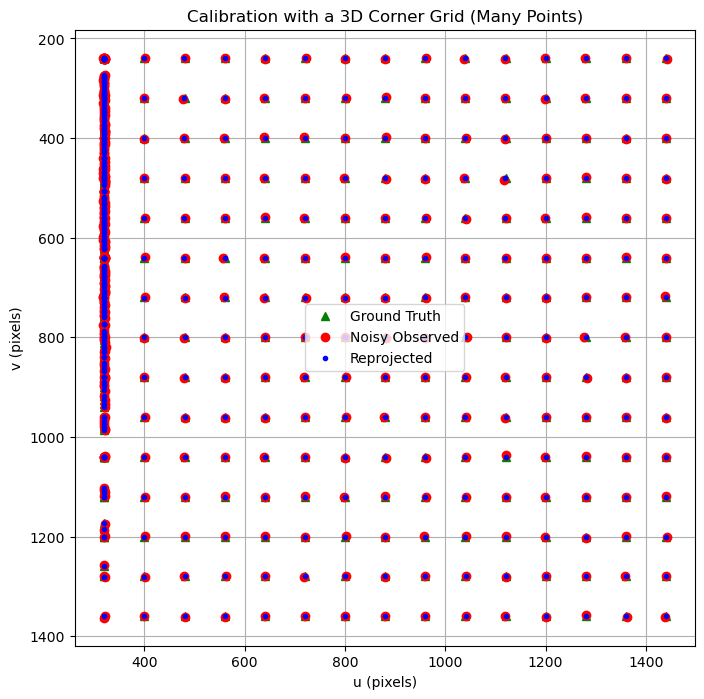

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def create_corner_pattern(nx=15, ny=15, spacing=20):
    """
    Creates a 3D 'corner' calibration rig:
      - A floor grid (plane) at Z = -300
      - A wall grid (plane) at X = 0
    Each grid is nx x ny, with a chosen spacing in millimeters or arbitrary units.
    """
    pts_floor = []
    pts_wall = []
    
    # Floor plane at Z = -300
    # Ranges in X and Y
    for i in range(nx):
        for j in range(ny):
            x = i * spacing
            y = j * spacing
            z = -300
            pts_floor.append([x, y, z])
    
    # Wall plane at X = 0
    # Ranges in Y and Z
    for i in range(ny):
        for j in range(nx):
            x = 0
            y = i * spacing
            z = -300 + j * spacing
            pts_wall.append([x, y, z])
    
    pts_floor = np.array(pts_floor)
    pts_wall = np.array(pts_wall)
    
    # Combine them
    pts3d = np.vstack([pts_floor, pts_wall])
    return pts3d

def reproject_points(M, pts3d):
    num_points = pts3d.shape[0]
    pts3d_h = np.hstack([pts3d, np.ones((num_points, 1))])
    pts_proj_h = (M @ pts3d_h.T).T
    pts_proj = pts_proj_h[:, :2] / pts_proj_h[:, 2][:, np.newaxis]
    return pts_proj

# === Example demonstration ===
if __name__ == "__main__":
    from numpy.linalg import inv, svd

    # 1) Create a corner pattern with many points
    pts3d = create_corner_pattern(nx=15, ny=15, spacing=20)
    
    # 2) Build a synthetic camera (intrinsics + extrinsics)
    alpha_true = 800
    beta_true  = 800
    theta_true = np.deg2rad(90)  # zero skew
    x0_true = 320
    y0_true = 240
    
    # Intrinsic matrix
    K_true = np.array([
        [alpha_true, 0,         x0_true],
        [0,          beta_true, y0_true],
        [0,          0,         1]
    ])
    
    # Rotation = identity, translation = (0, 0, 500)
    R_true = np.eye(3)
    t_true = np.array([0, 0, 500])
    
    # Full projection matrix: M_gt = K_true [R_true|t_true]
    M_gt = K_true @ np.hstack([R_true, t_true.reshape(3,1)])
    
    # 3) Reproject the 3D corner pattern
    pts2d = reproject_points(M_gt, pts3d)
    
    # 4) Add noise to simulate measurement error
    pts2d_noisy = pts2d + np.random.normal(0, 1.0, pts2d.shape)  # more points => smaller noise recommended
    
    # 5) Estimate the projection matrix M_est from (pts3d, pts2d_noisy)
    # Build design matrix
    N = pts3d.shape[0]
    P = []
    pts3d_h = np.hstack([pts3d, np.ones((N,1))])
    for i in range(N):
        X, Y, Z, _ = pts3d_h[i]
        u, v = pts2d_noisy[i]
        row1 = [X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u]
        row2 = [0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v]
        P.append(row1)
        P.append(row2)
    P = np.array(P)
    
    # Solve via SVD
    _, _, Vt = svd(P)
    m = Vt[-1, :]
    M_est = m.reshape(3,4)
    
    # 6) Reproject again using M_est
    pts2d_est = reproject_points(M_est, pts3d)
    
    # 7) Plot everything
    plt.figure(figsize=(8,8))
    plt.plot(pts2d[:,0], pts2d[:,1], 'g^', label='Ground Truth')
    plt.plot(pts2d_noisy[:,0], pts2d_noisy[:,1], 'ro', label='Noisy Observed')
    plt.plot(pts2d_est[:,0], pts2d_est[:,1], 'b.', label='Reprojected')
    plt.title("Calibration with a 3D Corner Grid (Many Points)")
    plt.xlabel("u (pixels)")
    plt.ylabel("v (pixels)")
    plt.gca().invert_yaxis()
    plt.legend()
    plt.grid(True)
    plt.show()


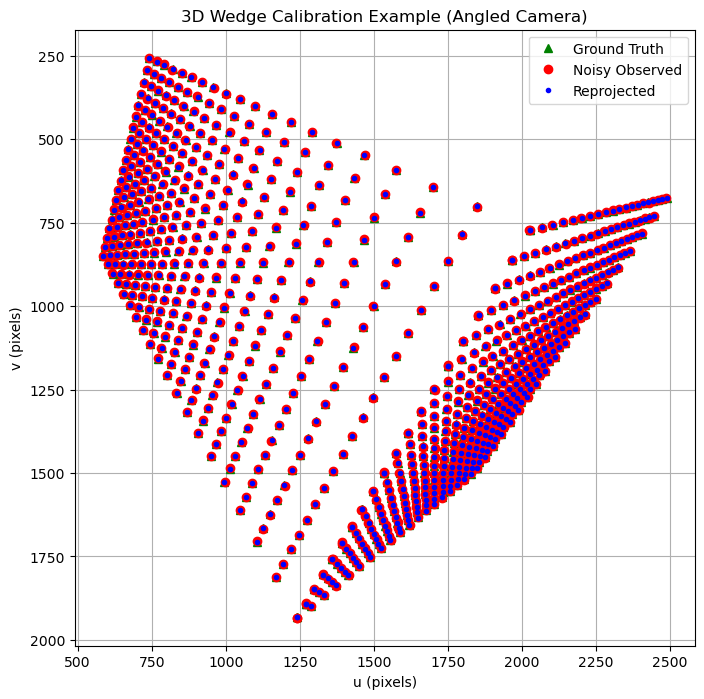

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd, inv

def create_wedge_pattern(nx=20, ny=20, spacing=30):
    """
    Creates a 3D 'wedge' of points by combining:
      1) A 'floor' plane (Z constant)
      2) A 'wall' plane (X constant)
    with large ranges so we see more perspective.
    """
    pts_floor = []
    pts_wall = []
    
    # Floor plane: Z = -800
    # X in [0, (nx-1)*spacing], Y in [0, (ny-1)*spacing]
    # (Just an example range)
    for i in range(nx):
        for j in range(ny):
            x = i * spacing
            y = j * spacing
            z = -800
            pts_floor.append([x, y, z])
    
    # Wall plane: X = 0
    # Y in [0, (ny-1)*spacing], Z in [-800, -800 + (nx-1)*spacing]
    for i in range(nx):
        for j in range(ny):
            x = 0
            y = j * spacing
            z = -800 + i * spacing
            pts_wall.append([x, y, z])
    
    pts_floor = np.array(pts_floor)
    pts_wall = np.array(pts_wall)
    pts3d = np.vstack([pts_floor, pts_wall])
    return pts3d

def build_synthetic_camera(alpha=1000, beta=1000, skew=0, x0=400, y0=300,
                           angles=(15, -20, 5), tvec=(200, -100, 1000)):
    """
    Builds a synthetic 3x4 projection matrix = K [R | t]
    given intrinsics + a chosen rotation (angles in degrees) and translation.
    """
    # Intrinsic matrix K
    #   alpha, beta: focal lengths in pixel units
    #   skew: usually 0 or near 0
    #   x0, y0: principal point
    K = np.array([
        [alpha, skew,  x0],
        [0,     beta,  y0],
        [0,     0,     1 ]
    ], dtype=float)
    
    # Convert Euler angles to a rotation matrix
    rx, ry, rz = np.deg2rad(angles)  # angles in degrees => radians
    # Rotation about X
    Rx = np.array([
        [1,         0,          0],
        [0, np.cos(rx), -np.sin(rx)],
        [0, np.sin(rx),  np.cos(rx)]
    ])
    # Rotation about Y
    Ry = np.array([
        [ np.cos(ry), 0, np.sin(ry)],
        [0,           1,         0],
        [-np.sin(ry), 0, np.cos(ry)]
    ])
    # Rotation about Z
    Rz = np.array([
        [np.cos(rz), -np.sin(rz), 0],
        [np.sin(rz),  np.cos(rz), 0],
        [0,           0,          1]
    ])
    # Full rotation (Rz * Ry * Rx for Z-Y'-X'' convention, or whichever you prefer)
    R = Rz @ Ry @ Rx
    
    # Translation
    t = np.array(tvec, dtype=float).reshape(3,1)
    
    # Projection matrix
    Rt = np.hstack([R, t])
    M = K @ Rt
    return M

def reproject_points(M, pts3d):
    """
    Reproject 3D points using the 3x4 matrix M.
    """
    n = pts3d.shape[0]
    pts3d_h = np.hstack([pts3d, np.ones((n,1))])
    pts2d_h = (M @ pts3d_h.T).T
    pts2d   = pts2d_h[:, :2] / pts2d_h[:, 2][:, None]
    return pts2d

def estimate_projection_matrix(pts3d, pts2d):
    """
    Solve for M via the standard linear method:
      (m1 - x_i m3)·P_i = 0,
      (m2 - y_i m3)·P_i = 0.
    """
    n = pts3d.shape[0]
    pts3d_h = np.hstack([pts3d, np.ones((n,1))])
    P = []
    for i in range(n):
        X, Y, Z, _ = pts3d_h[i]
        x, y = pts2d[i]
        row1 = [X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x]
        row2 = [0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y]
        P.append(row1)
        P.append(row2)
    P = np.array(P)
    # Solve via SVD
    _, _, Vt = svd(P)
    m = Vt[-1, :]
    M_est = m.reshape(3, 4)
    return M_est

def main():
    # 1) Create a wedge with more perspective range
    pts3d = create_wedge_pattern(nx=20, ny=20, spacing=30)

    # 2) Build a synthetic camera with angles => more perspective tilt
    M_gt = build_synthetic_camera(
        alpha=1000, beta=1000, skew=0,
        x0=400, y0=300,
        angles=(15, -20, 5),   # rotations about X, Y, Z in degrees
        tvec=(200, -100, 1000) # translation
    )

    # 3) Reproject
    pts2d_gt = reproject_points(M_gt, pts3d)

    # 4) Add noise
    noise_std = 1.0
    pts2d_noisy = pts2d_gt + np.random.normal(0, noise_std, pts2d_gt.shape)

    # 5) Estimate M from (pts3d, pts2d_noisy)
    M_est = estimate_projection_matrix(pts3d, pts2d_noisy)

    # 6) Reproject again using M_est
    pts2d_est = reproject_points(M_est, pts3d)

    # 7) Plot
    plt.figure(figsize=(8,8))
    plt.plot(pts2d_gt[:,0],    pts2d_gt[:,1],    'g^',  label='Ground Truth')
    plt.plot(pts2d_noisy[:,0], pts2d_noisy[:,1], 'ro',  label='Noisy Observed')
    plt.plot(pts2d_est[:,0],   pts2d_est[:,1],   'b.',  label='Reprojected')
    plt.gca().invert_yaxis()
    plt.title("3D Wedge Calibration Example (Angled Camera)")
    plt.xlabel("u (pixels)")
    plt.ylabel("v (pixels)")
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


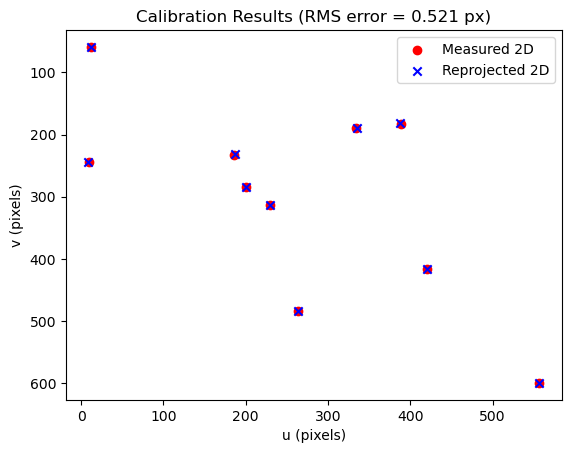

Estimated Projection Matrix M:
 [[-6.88424013e-01  2.68766537e-03 -2.02488442e-01  2.11243025e-02]
 [-3.46017952e-03 -6.82822882e-01 -1.33477381e-01  2.32725803e-02]
 [-3.73337165e-06  1.07016636e-05 -6.78875506e-04  5.15760067e-05]]
Estimated Intrinsic Matrix K:
 [[1.01225719e+03 4.85985024e+00 3.03824778e+02]
 [0.00000000e+00 1.00865643e+03 1.80737585e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Estimated Rotation R:
 [[-0.99997661  0.0039801   0.00556196]
 [ 0.00406721  0.99986786  0.01573936]
 [ 0.00549858 -0.01576161  0.99986066]]
Estimated Translation t:
 [-0.00783803 -0.02037075 -0.07596212]
RMS reprojection error =  0.520805692853994


In [59]:
import numpy as np
import matplotlib.pyplot as plt

def compute_projection_matrix(pts2d, pts3d):
    """
    Computes the 3×4 camera projection matrix M from 2D–3D correspondences
    using the linear least-squares method in Section 1.3.1.

    Parameters:
    -----------
    pts2d : ndarray of shape (N, 2)
        Array of 2D image points (u, v).
    pts3d : ndarray of shape (N, 3)
        Array of corresponding 3D world points (X, Y, Z).

    Returns:
    --------
    M : ndarray of shape (3, 4)
        The 3×4 projection matrix, defined up to an overall scale.
    """
    N = pts2d.shape[0]
    # Construct the 2N×12 design matrix P
    # Each 3D→2D correspondence gives two rows.
    P = []
    for i in range(N):
        X, Y, Z = pts3d[i]
        u, v = pts2d[i]
        row1 = [X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u]
        row2 = [0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v]
        P.append(row1)
        P.append(row2)
    P = np.array(P)  # shape is (2N, 12)

    # Solve P * m = 0 using SVD => m is the eigenvector corresponding
    # to the smallest singular value.
    U, S, Vt = np.linalg.svd(P)
    m = Vt[-1, :]  # last row of V^T
    # Reshape m into the matrix M
    M = m.reshape(3, 4)

    # We typically scale M so that the last entry is +1 or so that ||M||=1,
    # but it is not strictly required. The decomposition step below can
    # handle an M that is only known up to scale.
    return M

def decompose_projection_matrix(M):
    """
    Decompose the 3×4 matrix M into intrinsic parameters K and extrinsic
    parameters (R, t) following Eqs. (1.24)–(1.27) of the book section.

    Parameters:
    -----------
    M : ndarray of shape (3, 4)
        The 3×4 projection matrix.

    Returns:
    --------
    K : ndarray of shape (3, 3)
        Intrinsic calibration matrix.
    R : ndarray of shape (3, 3)
        Rotation matrix (orthonormal).
    t : ndarray of shape (3,)
        Translation vector.
    """
    # Split M into [A | b]
    A = M[:, 0:3]  # left 3×3
    b = M[:, 3]    # right 3×1

    # 1) Compute scale factor rho = 1 / ||a3||, where a3 is the 3rd row of A
    a1 = A[0, :]
    a2 = A[1, :]
    a3 = A[2, :]

    norm_a3 = np.linalg.norm(a3)
    # rho can be ±1 / norm_a3. We choose the sign so that t_z < 0 or based on convention.
    # Suppose we want the camera looking along +Z, with the world in front at negative Z.
    # Then we often want the third row's translation to be negative. We can pick a sign accordingly.
    rho = 1.0 / norm_a3

    # We'll store a small helper:
    def sign_of_z_translation(M_):
        # t = rho * np.linalg.inv(K) * b, but K not known yet
        # A simpler method is to see if the camera center has a + or - z.
        # Alternatively, we can do a quick partial check after we compute x0, y0 below.
        # For brevity, let's not overcomplicate. We'll fix sign after computing t.
        return 1.0

    # We'll first do the positive scale, then possibly flip sign at the end.
    # 2) r3 = rho * a3
    r3 = rho * a3

    # 3) compute x0 = rho^2 * (a1 dot a3), y0 = rho^2 * (a2 dot a3)
    x0 = rho**2 * np.dot(a1, a3)
    y0 = rho**2 * np.dot(a2, a3)

    # 4) compute alpha, beta, and skew = alpha * cot(theta)
    #    use eqs. (1.25)–(1.27).
    #    alpha = rho^2 * || a1 x a3 || * sin(theta)
    #    beta  = rho^2 * || a2 x a3 || * sin(theta)
    #    cos(theta) = -((a1 x a3) . (a2 x a3)) / (||a1 x a3|| ||a2 x a3||)

    cross_a1a3 = np.cross(a1, a3)
    cross_a2a3 = np.cross(a2, a3)
    norm_a1a3 = np.linalg.norm(cross_a1a3)
    norm_a2a3 = np.linalg.norm(cross_a2a3)

    # compute theta from the dot product
    dot_crosses = np.dot(cross_a1a3, cross_a2a3)
    cos_theta = - dot_crosses / (norm_a1a3 * norm_a2a3)
    theta = np.arccos(cos_theta)

    # sin(theta) might be small if the skew is near zero, but let's compute anyway
    sin_theta = np.sin(theta)

    # alpha and beta
    alpha = rho**2 * (norm_a1a3 * sin_theta)
    beta  = rho**2 * (norm_a2a3 * sin_theta)

    # skew
    # alpha*cot(theta) = -rho^2(a1 x a3), but let's do the direct formula:
    # skew = alpha * cot(theta)
    # be mindful of sign
    if abs(sin_theta) < 1e-12:
        # If the camera is near zero skew, then theta ~ 90 deg => skew=0
        skew = 0.0
    else:
        skew = alpha * (1.0 / np.tan(theta))

    # 5) Now find r1, r2 from eq. (1.27)
    #    r1 = (rho^2 sin(theta) / beta) (a2 x a3) = (1 / ||a2 x a3||) (a2 x a3)
    #    r2 = r3 x r1
    r1 = cross_a2a3 * (rho**2 * sin_theta / beta)
    # but from the text, it also simplifies that r1 is just (cross_a2a3 / ||a2 x a3||).
    # We'll use the direct formula from eq. (1.27):
    r1 = cross_a2a3 / norm_a2a3
    r2 = np.cross(r3, r1)

    # Construct R
    R = np.vstack([r1, r2, r3])

    # 6) Build K
    #  K = [[alpha, -alpha*cot(theta), x0],
    #       [0,     beta/sin(theta),   y0],
    #       [0,     0,                 1 ]]
    K = np.array([
        [alpha, -alpha * 1.0/np.tan(theta) if sin_theta!=0 else 0.0, x0],
        [0.0,    beta / sin_theta if sin_theta!=0 else beta,        y0],
        [0.0,    0.0,                                          1.0]
    ])

    # 7) Finally compute t = rho * K^-1 * b
    #    Because M = K [R | t], so b = K * t => t = K^-1 * b, scaled by rho
    invK = np.linalg.inv(K)
    t = rho * invK.dot(b)

    # Ensure the sign convention so that the 3rd component of t is negative (if desired),
    # matching "the origin is in front of the camera with negative z".
    if t[2] > 0:
        # Flip sign of M => flip sign of all recovered parameters
        r1 = -r1
        r2 = -r2
        r3 = -r3
        R = np.vstack([r1, r2, r3])
        t = -t
        # Rebuild K with negative alpha, etc. or simply keep K as is but know M was -M.
        # Typically we just keep K positive and interpret that we have flipped M's sign.
    # Re-assemble to ensure orthonormal R
    # (r1, r2, r3) are already orthonormal by construction, ignoring small numerical errors.

    return K, R, t

def project_points(M, pts3d):
    """
    Projects 3D points via the projection matrix M.

    Parameters:
    -----------
    M : ndarray of shape (3, 4)
    pts3d : ndarray of shape (N, 3)

    Returns:
    --------
    pts2d_projected : ndarray of shape (N, 2)
        The projected 2D points.
    """
    N = pts3d.shape[0]
    pts3d_h = np.hstack([pts3d, np.ones((N, 1))])  # make them homogeneous
    proj = M.dot(pts3d_h.T)  # shape = (3, N)
    # Normalize by the third row
    proj[0, :] /= proj[2, :]
    proj[1, :] /= proj[2, :]
    pts2d_proj = proj[:2, :].T  # shape (N, 2)
    return pts2d_proj

def rms_reprojection_error(M, pts2d, pts3d):
    """
    Compute the RMS reprojection error given M and known correspondences.

    Parameters:
    -----------
    M : ndarray of shape (3, 4)
    pts2d : ndarray of shape (N, 2)
    pts3d : ndarray of shape (N, 3)

    Returns:
    --------
    error : float
        The root-mean-square distance (in pixel units) between
        measured 2D points and projected 2D points.
    """
    pts2d_est = project_points(M, pts3d)
    diffs = pts2d_est - pts2d
    sq_errors = np.sum(diffs**2, axis=1)
    rmse = np.sqrt(np.mean(sq_errors))
    return rmse

def calibrate_camera(pts2d, pts3d, do_plot=True):
    """
    Main routine that:
      1) Computes M (3×4),
      2) Decomposes M into (K, R, t),
      3) Computes reprojection error,
      4) Optionally plots the original 2D points vs. reprojected 2D points.

    Parameters:
    -----------
    pts2d : ndarray (N, 2)
    pts3d : ndarray (N, 3)
    do_plot : bool
        If True, plot the original and reprojected points.

    Returns:
    --------
    M : ndarray of shape (3, 4)
    K : ndarray of shape (3, 3)
    R : ndarray of shape (3, 3)
    t : ndarray of shape (3,)
    rms_err : float
    """
    # 1) Estimate the 3×4 matrix
    M = compute_projection_matrix(pts2d, pts3d)

    # 2) Decompose M => K, R, t
    K, R, t = decompose_projection_matrix(M)

    # 3) Compute RMS error
    rms_err = rms_reprojection_error(M, pts2d, pts3d)

    # 4) Optional: plot
    if do_plot:
        pts2d_est = project_points(M, pts3d)
        plt.figure()
        plt.scatter(pts2d[:, 0], pts2d[:, 1], color='r', marker='o', label='Measured 2D')
        plt.scatter(pts2d_est[:, 0], pts2d_est[:, 1], color='b', marker='x', label='Reprojected 2D')
        plt.title(f"Calibration Results (RMS error = {rms_err:.3f} px)")
        plt.xlabel("u (pixels)")
        plt.ylabel("v (pixels)")
        plt.legend()
        plt.gca().invert_yaxis()  # if you want origin at bottom-left, remove this
        plt.show()

    return M, K, R, t, rms_err


# ------------------------ USAGE EXAMPLE -------------------------
if __name__ == "__main__":
    # Suppose pts2d and pts3d are loaded as (N,2) and (N,3) numpy arrays:
    # For demonstration, create a small synthetic dataset (replace with real data).
    # Here we assume the origin is in front of the camera (Z<0).
    np.random.seed(42)
    N = 10
    pts3d_example = np.random.randn(N, 3)
    pts3d_example[:, 2] -= 5.0  # shift so that Z is around -5
    # Fake ground-truth projection matrix for testing
    M_true = np.array([
        [1000,   0,  300,   0],
        [   0, 1000, 200,   0],
        [   0,    0,   1,   0]
    ])
    # Project to get synthetic 2D points
    pts2d_example = project_points(M_true, pts3d_example)
    # Add small noise
    pts2d_example += 0.5*np.random.randn(N, 2)

    # Calibrate
    M_est, K_est, R_est, t_est, error_est = calibrate_camera(pts2d_example, pts3d_example, do_plot=True)

    print("Estimated Projection Matrix M:\n", M_est)
    print("Estimated Intrinsic Matrix K:\n", K_est)
    print("Estimated Rotation R:\n", R_est)
    print("Estimated Translation t:\n", t_est)
    print("RMS reprojection error = ", error_est)


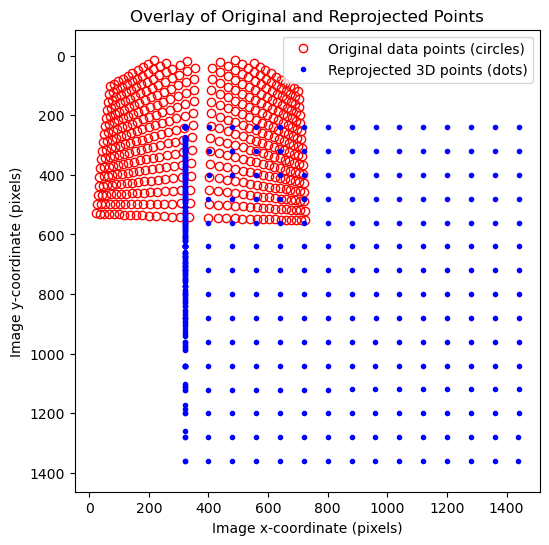

In [68]:
import matplotlib.pyplot as plt

# Suppose:
#   pts2d     = array of shape (N, 2) with the original detected 2D points
#   pts2d_est = array of shape (N, 2) with the reprojected points from M

plt.figure(figsize=(6,6))

# Plot original data points as red circles (unfilled)
plt.plot(
    pts2d[:, 0], pts2d[:, 1],
    'ro', markerfacecolor='none', label='Original data points (circles)'
)

# Plot reprojected data points as blue dots
plt.plot(
    pts2d_est[:, 0], pts2d_est[:, 1],
    'b.', label='Reprojected 3D points (dots)'
)

# Optional styling to mimic the figure in the text:
plt.gca().invert_yaxis()   # If your image coordinates have y increasing down
plt.axis('equal')          # Equal aspect ratio
plt.legend()
plt.title("Overlay of Original and Reprojected Points")
plt.xlabel("Image x-coordinate (pixels)")
plt.ylabel("Image y-coordinate (pixels)")

plt.show()


In [61]:
plt.scatter(pts2d[0], color='red', label='Original 2D Points')
# plt.scatter(projected_pts[0], projected_pts[1], color='blue', marker='+', label='Projected Points')
plt.legend()
plt.xlabel('u (image x-axis)')
plt.ylabel('v (image y-axis)')
plt.title('Comparison of Original and Projected 2D Points')
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'